In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:\DeepLearning\insurance fraud claims.csv")

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
df.drop("_c39",axis=1,inplace=True)

In [7]:
df.authorities_contacted.unique()

array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

In [8]:
df.fillna("Police",inplace=True)#Fillna only works on integers

In [9]:
df.authorities_contacted

0      Police
1      Police
2      Police
3      Police
4      Police
        ...  
995      Fire
996      Fire
997    Police
998     Other
999    Police
Name: authorities_contacted, Length: 1000, dtype: object

In [10]:
df.apply(pd.Series.nunique)

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [11]:
df.select_dtypes(include=['object'])

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2014-10-17,OH,250/500,MALE,MD,craft-repair,sleeping,husband,2015-01-25,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,2006-06-27,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,2015-01-21,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,2000-09-06,OH,100/300,FEMALE,PhD,sales,board-games,own-child,2015-02-22,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,1990-05-25,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,2015-01-10,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,2014-06-06,IL,500/1000,MALE,Associate,sales,board-games,unmarried,2015-02-17,Vehicle Theft,...,Minor Damage,Police,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1991-07-16,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,2015-02-22,Single Vehicle Collision,...,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,YES,?,Honda,Accord,N
996,2014-01-05,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,2015-01-24,Single Vehicle Collision,...,Major Damage,Fire,SC,Northbend,3092 Texas Drive,YES,?,Volkswagen,Passat,N
997,2003-02-17,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,2015-01-23,Multi-vehicle Collision,...,Minor Damage,Police,NC,Arlington,7629 5th St,?,YES,Suburu,Impreza,N
998,2011-11-18,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,2015-02-26,Single Vehicle Collision,...,Major Damage,Other,NY,Arlington,6128 Elm Lane,?,YES,Audi,A5,N


In [12]:
df.drop("incident_location",axis=1)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [13]:
df.drop("policy_number",axis=1)

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
LE=LabelEncoder()

In [16]:
for col in df.select_dtypes(include=['object']):
    df[col]=LE.fit_transform(df[col])

In [17]:
df.select_dtypes(include=['object'])

""
0
1
2
3
4
...
995
996
997
998


In [18]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,940,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,635,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,413,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,19,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,922,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,67,2,2,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,907,0,0,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,514,2,1,500,1383.49,3000000,442797,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,831,0,2,2000,1356.92,5000000,441714,...,1,2,46980,5220,5220,36540,1,5,1998,0


In [19]:
df.police_report_available

0      2
1      0
2      1
3      1
4      1
      ..
995    0
996    0
997    2
998    2
999    0
Name: police_report_available, Length: 1000, dtype: int32

In [20]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [21]:
df.corr()['fraud_reported']

months_as_customer             0.020544
age                            0.012143
policy_number                 -0.029443
policy_bind_date              -0.000856
policy_state                   0.029432
policy_csl                    -0.037190
policy_deductable              0.014817
policy_annual_premium         -0.014480
umbrella_limit                 0.058622
insured_zip                    0.019368
insured_sex                    0.030873
insured_education_level        0.008808
insured_occupation             0.001564
insured_hobbies               -0.046838
insured_relationship           0.021043
capital-gains                 -0.019173
capital-loss                  -0.014863
incident_date                 -0.050710
incident_type                 -0.050376
collision_type                 0.110130
incident_severity             -0.405988
authorities_contacted         -0.099688
incident_state                -0.051407
incident_city                 -0.040403
incident_location             -0.008832


In [22]:
df.drop("policy_number",axis=1,inplace=True)

In [23]:
df.drop(['policy_bind_date','policy_csl','insured_hobbies','incident_date','incident_location','incident_state',
        'incident_city','incident_severity'],axis=1,inplace=True)

In [24]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [25]:
indep=['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year']
x=df[indep]

In [26]:
x

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,2,1000,1406.91,0,466132,1,4,2,...,1,2,2,71610,6510,13020,52080,10,1,2004
1,228,42,1,2000,1197.22,5000000,468176,1,4,6,...,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,2,2000,1413.14,5000000,430632,0,6,11,...,2,3,1,34650,7700,3850,23100,4,30,2007
3,256,41,0,2000,1415.74,6000000,608117,0,6,1,...,1,2,1,63400,6340,6340,50720,3,34,2014
4,228,44,0,1000,1583.91,6000000,610706,1,0,11,...,0,1,1,6500,1300,650,4550,0,31,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0,431289,0,5,2,...,0,1,0,87200,17440,8720,61040,6,6,2006
996,285,41,0,1000,1436.79,0,608177,0,6,9,...,2,3,0,108480,18080,18080,72320,13,28,2015
997,130,34,2,500,1383.49,3000000,442797,0,5,1,...,2,3,2,67500,7500,7500,52500,11,19,1996
998,458,62,0,2000,1356.92,5000000,441714,1,0,5,...,0,1,2,46980,5220,5220,36540,1,5,1998


In [27]:
y=df.fraud_reported

In [28]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [31]:
x_train

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
197,223,43,2,500,1734.09,0,451400,0,4,0,...,0,3,0,5200,650,650,3900,0,23,2006
242,190,40,2,2000,965.21,0,610354,0,3,3,...,2,1,2,6300,630,630,5040,9,35,2001
939,279,45,1,2000,1333.97,6000000,620819,0,4,7,...,1,0,0,61050,11100,11100,38850,4,30,2011
356,229,37,0,2000,1212.12,0,446544,0,4,2,...,1,1,2,68760,11460,5730,51570,5,16,1995
246,2,28,0,1000,1340.56,0,433184,0,3,6,...,0,2,2,58140,6460,6460,45220,10,1,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,338,49,1,1000,1279.08,0,449718,1,4,7,...,0,1,0,4300,860,860,2580,5,14,2004
672,61,25,1,2000,988.06,0,460579,0,5,7,...,1,0,1,32320,4040,4040,24240,4,30,2000
11,447,61,2,2000,1137.16,0,615561,0,2,3,...,1,2,2,114920,17680,17680,79560,1,4,2006
498,405,58,0,500,1237.88,0,462683,1,4,3,...,0,0,0,63580,5780,5780,52020,8,24,1997


In [32]:
y_train

197    0
242    0
939    1
356    0
246    0
      ..
69     0
672    0
11     0
498    1
940    0
Name: fraud_reported, Length: 800, dtype: int32

In [33]:
x_test

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
970,213,35,2,500,871.46,0,477938,1,4,12,...,2,0,2,74140,13480,6740,53920,5,13,2007
523,85,30,2,1000,796.35,0,614166,0,4,2,...,2,1,2,58960,5360,10720,42880,5,14,2004
805,290,42,1,500,989.97,0,462519,1,5,6,...,0,1,1,48000,4800,9600,33600,10,3,2013
79,227,38,2,500,976.67,0,471600,0,6,5,...,1,2,0,72200,14440,7220,50540,2,22,2013
768,446,61,0,1000,1232.79,0,441967,0,2,0,...,2,0,2,70500,7050,14100,49350,11,15,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,98,26,1,2000,1082.10,0,477268,1,3,3,...,0,1,2,65430,14540,7270,43620,7,36,2001
293,147,34,0,1000,1275.81,0,472657,1,2,11,...,2,2,0,101010,15540,15540,69930,8,24,1998
748,322,44,0,1000,1156.19,0,606249,0,1,6,...,0,3,0,49400,9880,4940,34580,7,36,2010
855,198,36,1,1000,1096.39,0,603848,1,2,1,...,1,3,2,49410,5490,5490,38430,1,4,2015


In [34]:
y_test

970    0
523    0
805    0
79     1
768    0
      ..
911    0
293    0
748    0
855    0
405    0
Name: fraud_reported, Length: 200, dtype: int32

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()

In [37]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [38]:
x_train_scaled

array([[ 0.15995034,  0.42428922,  1.21109786, ..., -1.63434379,
         0.34690268,  0.13654211],
       [-0.12254156,  0.10081586,  1.21109786, ...,  0.59009388,
         1.43415887, -0.69098584],
       [ 0.63933052,  0.63993812, -0.00608592, ..., -0.64570483,
         0.98113546,  0.96407007],
       ...,
       [ 2.07747108,  2.36512935,  1.21109786, ..., -1.38718405,
        -1.37458629,  0.13654211],
       [ 1.71793594,  2.04165599, -1.2232697 , ...,  0.34293414,
         0.43750736, -1.35300821],
       [ 0.88758098,  0.85558702,  1.21109786, ...,  1.08441337,
        -0.01551605, -0.52548025]])

In [39]:
x_test_scaled

array([[ 0.07434673, -0.4383064 ,  1.21109786, ..., -0.39854508,
        -0.55914415,  0.3020477 ],
       [-1.02137941, -0.97742865,  1.21109786, ..., -0.39854508,
        -0.46853946, -0.19446907],
       [ 0.73349449,  0.31646477, -0.00608592, ...,  0.83725363,
        -1.46519097,  1.29508125],
       ...,
       [ 1.00742602,  0.53211367, -1.2232697 , ...,  0.0957744 ,
         1.52476355,  0.79856448],
       [-0.05405868, -0.33048194, -0.00608592, ..., -1.38718405,
        -1.37458629,  1.62609244],
       [-1.19258662, -0.97742865, -0.00608592, ..., -0.15138534,
        -0.83095819, -1.02199703]])

LOGISTIC REGRESSION

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model=LogisticRegression()

In [42]:
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [43]:
model.score(x_train_scaled,y_train)

0.755

In [44]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [45]:
LR=model.predict(x_test_scaled)
print('Classification Report:')
print(classification_report(y_test,LR))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       151
           1       0.40      0.04      0.07        49

    accuracy                           0.75       200
   macro avg       0.58      0.51      0.46       200
weighted avg       0.67      0.75      0.66       200



In [46]:
accuracy_score(y_test,LR)

0.75

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test,LR)

array([[148,   3],
       [ 47,   2]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

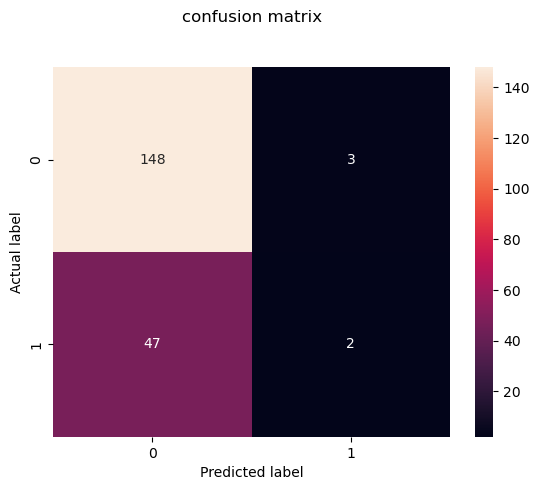

In [49]:
cnf_matrix=metrics.confusion_matrix(y_test,LR)
p=sns.heatmap(data=cnf_matrix,annot=True,fmt='g')
plt.title('confusion matrix',y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

DECISION TREE

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
model1=DecisionTreeClassifier()

In [52]:
model1.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [53]:
model1.score(x_train_scaled,y_train)

1.0

In [54]:
DT=model1.predict(x_test_scaled)

In [55]:
DT

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1])

In [56]:
print('Classification Report:')
print(classification_report(y_test,DT))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       151
           1       0.27      0.29      0.28        49

    accuracy                           0.64       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.64      0.64      0.64       200



In [57]:
accuracy_score(y_test,DT)

0.635

In [58]:
confusion_matrix(y_test,DT)

array([[113,  38],
       [ 35,  14]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

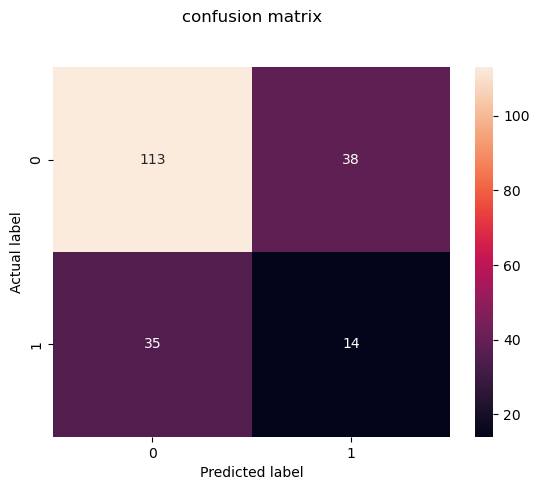

In [59]:
cnf_matrix=metrics.confusion_matrix(y_test,DT)
p=sns.heatmap(data=cnf_matrix,annot=True,fmt='g')
plt.title('confusion matrix',y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

RANDOM FOREST

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
model2=RandomForestClassifier()

In [62]:
model2.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [63]:
RF=model2.predict(x_test_scaled)

In [64]:
model2.score(x_test_scaled,y_test)

0.745

In [65]:
print('Classification Report:')
print(classification_report(y_test,RF))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       151
           1       0.00      0.00      0.00        49

    accuracy                           0.74       200
   macro avg       0.38      0.49      0.43       200
weighted avg       0.57      0.74      0.64       200



In [66]:
accuracy_score(y_test,RF)

0.745

In [67]:
confusion_matrix(y_test,RF)

array([[149,   2],
       [ 49,   0]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

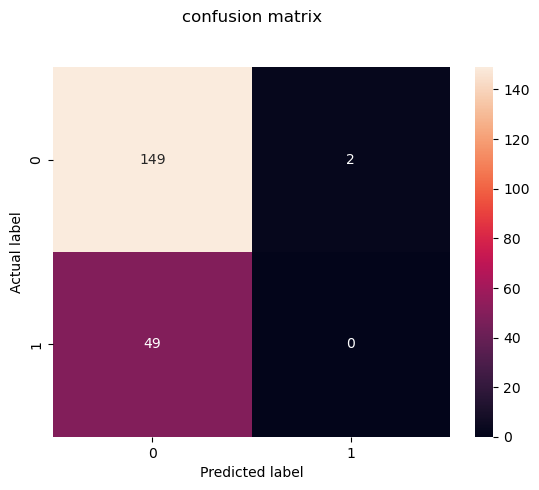

In [68]:
cnf_matrix=metrics.confusion_matrix(y_test,RF)
p=sns.heatmap(data=cnf_matrix,annot=True,fmt='g')
plt.title('confusion matrix',y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

SUPPORT VECTOR MACHINE

In [69]:
from sklearn.svm import SVC

In [70]:
model3=SVC(kernel="sigmoid")

In [71]:
sv_fit=model3.fit(x_train_scaled,y_train)

In [72]:
sv_fit

SVC(kernel='sigmoid')

In [73]:
model3.score(x_train_scaled,y_train)

0.75125

In [74]:
sv_pre=model3.predict(x_test_scaled)

In [75]:
model3.score(x_test_scaled,y_test)

0.755

In [76]:
accuracy_score(y_test,sv_pre)

0.755

In [77]:
print('Classification Report:')
print(classification_report(y_test,sv_pre))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 23.52222222222222, 'Predicted label')

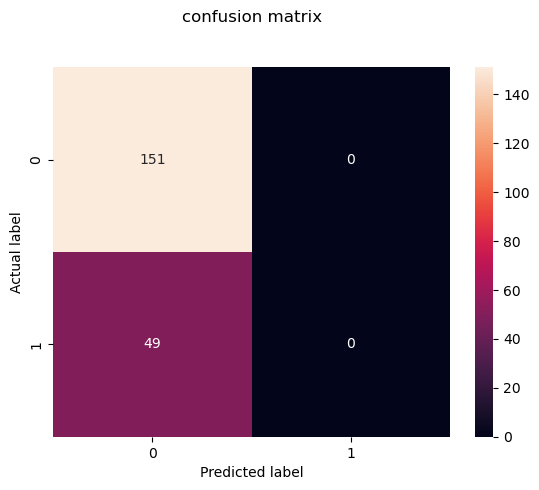

In [78]:
cnf_matrix=metrics.confusion_matrix(y_test,sv_pre)
p=sns.heatmap(data=cnf_matrix,annot=True,fmt='g')
plt.title('confusion matrix',y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

<Axes: xlabel='fraud_reported', ylabel='count'>

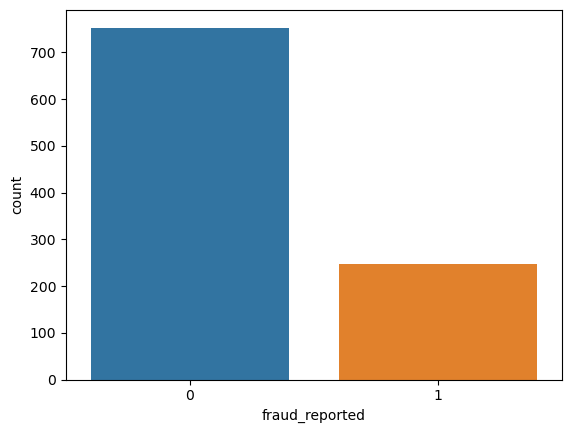

In [79]:
sns.countplot(x='fraud_reported',data=df)

DEEP LEARNING